In [1]:
# add folders to Python's search space
import os, sys
from pathlib import Path
script_dir = Path(os.path.dirname(os.path.abspath('')))
module_dir = str(script_dir)
sys.path.insert(0, module_dir + '/modules')
print(module_dir)

# import the rest of the modules
%matplotlib nbagg
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
import arch
import pandas as pd
DTYPE = 'float32'

C:\Users\pinak\Documents\GitHub\var-al


In [2]:
# load learned solutions
net_p = arch.VanillaNet(50, 3, DTYPE, name="sphere-geodesic")
net_p.load_weights('../data/sphere-geodesic-inf/{}'.format(net_p.name)).expect_partial()

# net_al = arch.VanillaNet(50, 3, DTYPE, name='helicoid-al')
# net_al.load_weights('../data/helicoid-al/{}'.format(net_al.name)).expect_partial()

# set up plotting parameters
scale = 0
xlabel_size = ylabel_size = 15 + scale
tick_size = 10 + scale
legend_size = 15 + scale
title_size = 15 + scale
cbar_tick_size = 10 + scale
line_color = "darkgrey"

# plot solutions
def plot_solutions(filename, resolution=50):
    fig = plt.figure(figsize=(8, 8))
    ax_p = fig.add_subplot(111, projection='3d')
  
    # plotting params  
    ax_p.tick_params(axis='both', which='major', labelsize=tick_size)
    ax_p.tick_params(axis='both', which='minor', labelsize=tick_size)
    ax_p.set_title('Learned geodesics with penalty method', fontsize=title_size)
    ax_p.set_xlabel('x', fontsize=xlabel_size)
    ax_p.set_ylabel('y', fontsize=ylabel_size)
    ax_p.set_zlabel('z', fontsize=ylabel_size)
    
    v1 = np.array([0., 0., 1 ], dtype=DTYPE) 
    phi_1 = net_p(tf.constant([[np.pi/2.]], dtype=DTYPE))
    v2 = np.array([np.cos(phi_1), np.sin(phi_1), 0 ], dtype=DTYPE)
    w = v2 - np.dot(v1, v2)*v1
    w = w/np.linalg.norm(w, ord=2)

    alpha = np.arccos(v1[2], dtype=DTYPE)
    phi_0 = np.arctan2(v1[1], v1[0], dtype=DTYPE) 
    if phi_0 < 0:
        phi_0 += 2.*np.pi
    beta = np.arccos(v2[2], dtype=DTYPE)
    phi_1 = np.arctan2(v2[1], v2[0], dtype=DTYPE)
    if phi_1 < 0:
        phi_1 += 2.*np.pi
    gamma = np.arccos(np.dot(v1, v2), dtype=DTYPE)
    

    p = np.linspace(0., 2.*np.pi, num=100, endpoint=True).astype(DTYPE)
    t = np.linspace(0., np.pi, num=100, endpoint=True).astype(DTYPE)
    
    p2 = np.linspace(0., 2.*np.pi, num=resolution, endpoint=True).astype(DTYPE)
    t2 = np.linspace(0., np.pi, num=resolution, endpoint=True).astype(DTYPE)
    
    p0, t0 = np.meshgrid(p2, t2)
    p1 = np.ones_like(t)
   
    
    
    c, s = np.cos(t0), np.sin(t0)
    c1, s1 = np.cos(t), np.sin(t)
    xs, ys, zs = s*np.cos(p0), s*np.sin(p0), c
    
    def true(t):
        return tf.cos(t) * v1 + tf.sin(t) * w
    
    z_p = true(p.reshape(-1, 1)).numpy()
    ax_p.plot(z_p[:, 0], z_p[:, 1], z_p[:, 2], color='deeppink',\
              linewidth=2, label='Great Circle', linestyle='--')
    
    ax_p.set_box_aspect((np.ptp(xs), np.ptp(ys), np.ptp(zs))) 
    ax_p.plot_wireframe(xs, ys, zs, color='black', alpha=0.5, linewidth=0.5)
    ax_p.scatter([0, 0], [0, 0], [1, -1], color='black', s=100)
    net_p.load_weights('../data/sphere-geodesic-inf/{}_1000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, linewidth=2., label='Iteration 1000')
    net_p.load_weights('../data/sphere-geodesic-inf/{}_2000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, linewidth=2., label='Iteration 2000')
    net_p.load_weights('../data/sphere-geodesic-inf/{}_3000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, linewidth=2., label='Iteration 3000')
    net_p.load_weights('../data/sphere-geodesic-inf/{}_4000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, linewidth=2., label='Iteration 4000')
    net_p.load_weights('../data/sphere-geodesic-inf/{}_5000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, linewidth=2., label='Iteration 5000')
    net_p.load_weights('../data/sphere-geodesic-inf/{}_6000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, linewidth=2., label='Iteration 6000')
    net_p.load_weights('../data/sphere-geodesic-inf/{}_7000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, linewidth=2., label='Iteration 7000')
    net_p.load_weights('../data/sphere-geodesic-inf/{}_8000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, linewidth=2., label='Iteration 8000')
    net_p.load_weights('../data/sphere-geodesic-inf/{}_9000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, linewidth=2., label='Iteration 9000')
    net_p.load_weights('../data/sphere-geodesic-inf/{}_10000'.format(net_p.name)).expect_partial()
    z_p = net_p(t.reshape(-1, 1)).numpy()
    phi = z_p.flatten()
    ax_p.plot(s1*np.cos(phi), s1*np.sin(phi), c1, color='red', linewidth=2., label='Iteration 10000')
    ax_p. grid(False)
    ax_p.legend(fontsize=legend_size-3)

    fig.tight_layout()
    plt.savefig('{}.png'.format(filename), dpi=300)
    plt.show()

# plot_solutions(filename='../plots/sphere-geodesic-antipodal', resolution=20)

<IPython.core.display.Javascript object>


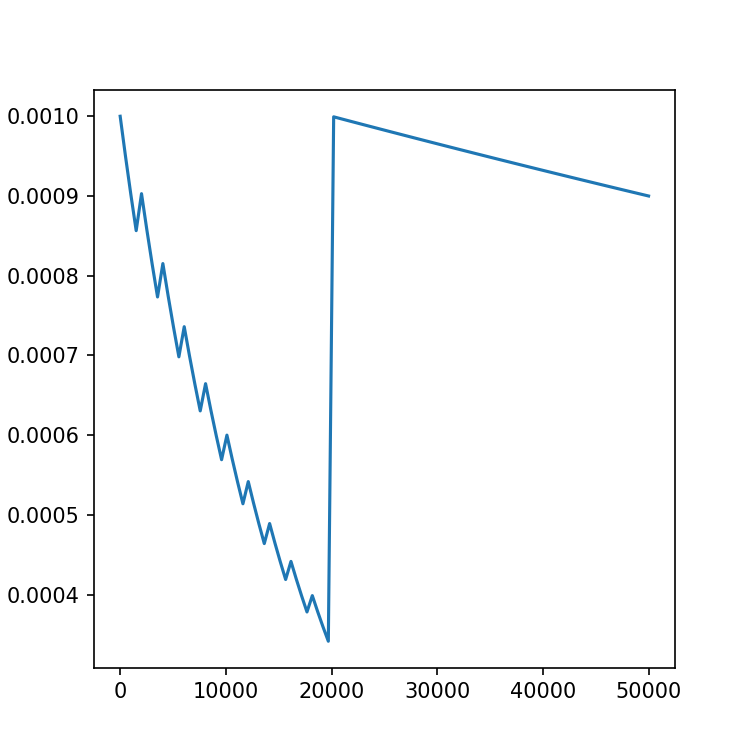

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
epochs, tau, b0, delb, maxb = 50000, 10, 1, 10, 10000
initial_rate = 1e-3
decay_rate = 0.9
decay_steps = int(2*tau)
final_learning_rate = 1e-3
final_decay_rate = 0.9
drop = 0.999
tipping_point = int(2*tau*(maxb-b0)/delb)
final_decay_steps = epochs - tipping_point
lr = arch.CyclicLR(initial_rate, decay_rate, decay_steps,\
                            final_learning_rate, final_decay_rate, final_decay_steps, drop, tipping_point)
x = np.linspace(0, 50000, num=100)
#y = [lr_schedule(i) for i in x]
ax.plot(x, lr(x))

In [4]:
1-tf.nn.relu(tf.sign(19000-lr.tipping_point))

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [5]:
1-tf.nn.relu(tf.sign(20000-lr.tipping_point))

<tf.Tensor: shape=(), dtype=int32, numpy=0>